### Kernel methods

[Wiki](https://en.wikipedia.org/wiki/Kernel_method):

"Ядерные методы получили своё название из-за использования ядерных функций, которые позволяют им оперировать в неявном пространстве признаков высокой размерности без вычисления координат данных в пространстве, просто вычисляя скалярные произведения между образами всех пар данных в пространстве признаков. Эта операция часто вычислительно дешевле явных вычислений координат. Этот подход называется «ядерным трюком» (kernel trick)."

<img src="https://courses.cs.ut.ee/2011/graphmining/uploads/Main/pm.png">

<img src="https://courses.cs.ut.ee/2011/graphmining/uploads/Main/kf.png">

Примеры [ядер](http://www.machinelearning.ru/wiki/index.php?title=%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D1%8F%D0%B4%D1%80%D0%B0):

<img src="https://i.stack.imgur.com/MB5Kt.png" width=500>

Гауссовское ядро как скалярное произведение в бесконечномерном пространстве:

<img src="https://i.stack.imgur.com/SkUC4.png">

### [Kernel k-means](https://www.ics.uci.edu/~welling/teaching/273ASpring09/SpectralClustering.pdf)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples = 300, noise=0.1, random_state=0)

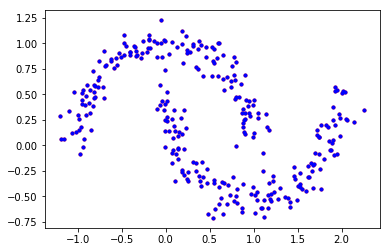

In [52]:
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(X[:,0], X[:,1], 'b.')

In [53]:
from sklearn.metrics.pairwise import rbf_kernel

def kernel_function(X1,X2=None):
    gamma = 5
    if X2 is not None:
        return rbf_kernel(X1, X2, gamma=gamma)
    else:
        return rbf_kernel(X1, gamma=gamma)

In [54]:
Kmat = kernel_function(X)

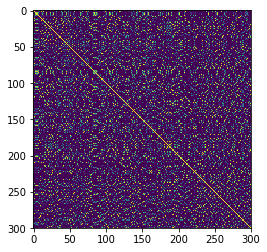

In [55]:
plt.imshow(Kmat)

In [47]:
def kernel_kmeans(Kmat, k):
    N = Kmat.shape[0]
    max_iter = 100
    D = np.random.rand(N,k)
    z = np.argmin(D, axis=1)
    for iteration in range(max_iter):
        
        for c in range(k):
            nc = np.sum(z==c)
            if nc > 0:
                D[:,c] = np.diag(Kmat) - 2/nc*np.sum(Kmat[:,z==c],axis=1) + 1/(nc**2)*np.sum(Kmat[z==c,z==c])
            else:
                D[:,c] = np.inf
            
        z = np.argmin(D, axis=1)
    
    return z

In [48]:
z = kernel_kmeans(Kmat, 2)

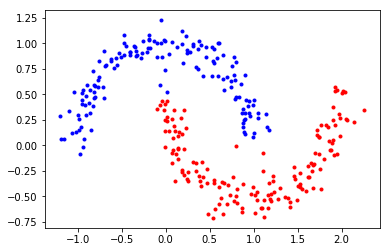

In [49]:
plt.plot(X[z==0,0], X[z==0,1], 'r.')
plt.plot(X[z==1,0], X[z==1,1], 'b.')

In [56]:
idx = np.argsort(z)

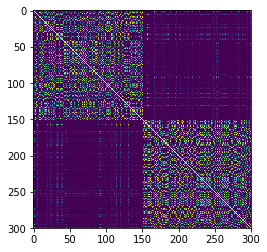

In [62]:
plt.imshow(Kmat[idx,:][:,idx])

### Ordinary k-means

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
z_ = kmeans.labels_

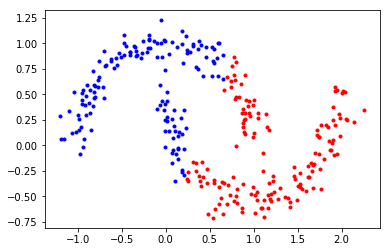

In [64]:
plt.plot(X[z_==0,0], X[z_==0,1], 'r.')
plt.plot(X[z_==1,0], X[z_==1,1], 'b.')